## Assignment 3 : Boston Housing

Name : Sibylle Avelena

SID: 100379767

#### Objective:

* Is to train a model to predict the housing price
* Is to analyse the model's performance

#### To do:
* Conduct univariate analysis
* Condict bivariate analysis
* Split the model
* Training model
* Build linear regression model
* Check performance
* Conduct cross-validation 

### Importing Library

#### I am importing some of the libraries I believe will be useful for the analysis. Others will be added along the way.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets

### Attribute Information:
#### It is necessary to understand the abbreviations of the variables to conduct analysis.

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 Dollar
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000 Dollars

#### Reading data into Python

As the Boston Housing dataset is one of the built in datasets in Python, I can use the 'datasets.load_boston()' to retrieve the file.

I then transform the file into a dataframe for easier navigation and analyses.

In [2]:
#read data into python
boston = datasets.load_boston()
df = pd.DataFrame(data=boston['data'], columns = boston['feature_names'])
df['MEDV'] = boston['target']
df

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


To check the variables and to get to know the data, I check the head. Certain variables like RAD, CHAS and ZN caught my interest. RAD and CHAS are both categorical with numbers and ZN seems to have a lot of zeros.

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Checking for missing values
To check for missing values, I check to see if there are non-null values and if the number of observations are the same for each variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Again, I that the RAD and CHAS which is supposedly a categorical variable is denoted as a float. Thus, I decided to change it to categorical. Later on in the linear regression analysis, we might need to one hot encode RAD to have a better analysis.

In [5]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [6]:
df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

As the data type of RAD and CHAS are categorical and not numerical, I decided to change them into category.

In [7]:
df.RAD=df.RAD.astype('int')
df.RAD=df.RAD.astype('category')

df.CHAS = df.CHAS.astype('int')
df.CHAS = df.CHAS.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


#### Again, to check the missing values of the variables I find the number na using the .isna function and then uses the .sum to add all the na if present

In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

* There are no missing data observed. All of the data has 506 observations which are non-null, and is further enforced by the second code (.isna().sum()) which would have summed the null values if present in any of the columns.

### 1. Check the summary statistics and make statements on all features using all statistical properties (mean, 50th percentile, 75% percentile, max, standard deviation).

In [9]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Through the describe( ) function, we can see clearly the statistical properties of the data. As the varibales in this dataset are all numerical, they are all displayed above. Certain variable like CHAS may seem strange as it has a lot of zeros. However, this is because the variable comprises of only 1 and 0 (binomial) values.

 Summary statistics is also a good way to do univariate analysis as it shows clearly the measure of dispersion (range, standard deviation, and the interquartile range) as well as the central tendency measurement from the mean and median value.

### 2. Conduct univariate analysis to identify some patterns in the datasets. This should include graphs, charts, and descriptions

#### Univariate analysis is beneficial to see the distribution and frequency of data. 

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

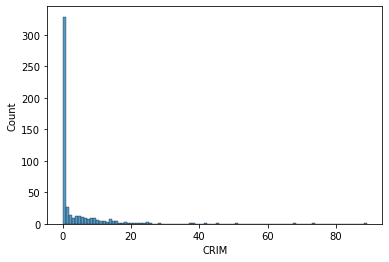

In [10]:
CRIM = df['CRIM']

sns.histplot(CRIM)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

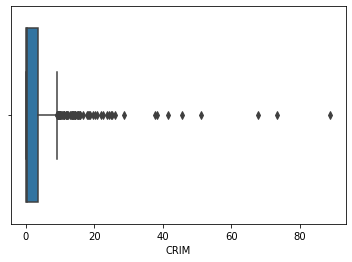

In [11]:
sns.boxplot(CRIM)

In [12]:
CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

#### Interpretation:
* The distribution of proportion of the crime rate shows a very right skewed graph with a lot of outliers
* This can be further seen from the larger mean (11.36) compared to the median value (0)
* The boxplot further shows that the whole data spreadability is large as seen by the range below. However, the dataset spreadability is quite small seeing from the std and IQR below.
    * Range : Max (88.976) - Min(0.006) = 88.970
    * Std : 8.6
    * IQR : IQR3(3.67) - IQR(0.08) = 2.59

<AxesSubplot:xlabel='ZN', ylabel='Count'>

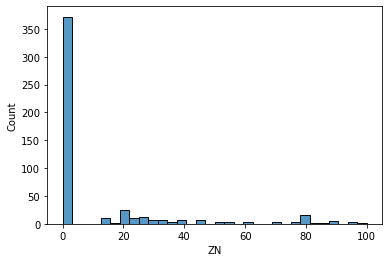

In [13]:
ZN = df['ZN']

sns.histplot(ZN)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

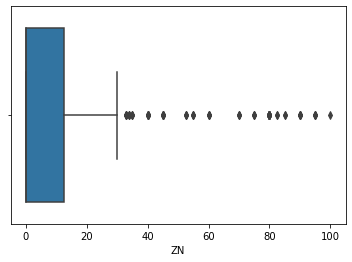

In [14]:
sns.boxplot(ZN)

In [15]:
ZN.describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

#### Interpretation:
* The distribution of proportion of residential land zoned shows a very right skewed graph with a lot of outliers
* This can be further seen from the larger mean (11.36) compared to the median value (0)
* The boxplot further shows that both the whole data and the dataset spreadability is quite large seeing from:
    * Range : Max (100) - Min(0) = 100
    * Std : 23.32
    * IQR : IQR3(12.5) - IQR(0) = 12.5

<AxesSubplot:xlabel='INDUS', ylabel='Count'>

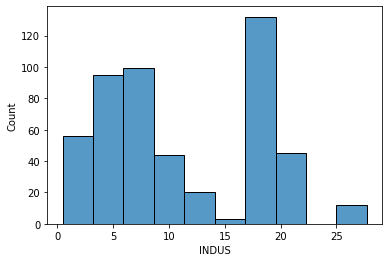

In [16]:
INDUS = df['INDUS']
sns.histplot(INDUS)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INDUS'>

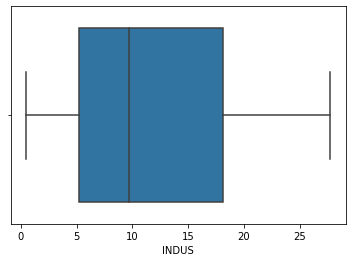

In [17]:
sns.boxplot(INDUS)

In [18]:
INDUS.describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

#### Interpretation:
* The distribution of proportion of non-retail business shows a right skewed graph as seen by the boxplot. There are also no outliers identified.
* The shape of the graph can be further seen from the larger mean (11.136) compared to the median value (9.69)
* The boxplot further shows that the whole data spreadability and the dataset spreadability is relatively small:
    * Range : Max (27.74) - Min(0.46) = 27.28
    * Std : 6.86
    * IQR : IQR3(18.10) - IQR(5.19) = 12.91

<AxesSubplot:>

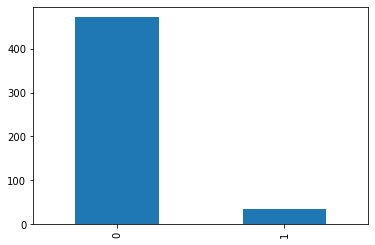

In [19]:
CHAS = df['CHAS']
CHAS.value_counts().plot.bar()

In [20]:
CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

#### Interpretation:
* As the CHAS variable is a categorical variable, it only has 1s and 0s as it's data, it is quite difficult to see the distribution of the variable.
* However, we can still see the frequency of 1(tract bound rivers) and 0 (otherwise) within the variable:
    * There are only 35 districts that are close to the Charles River.
    * The rest which is the majority of 471 are not.
    * From the values above we can conclude that the river does not flow through many of the housing area and there may be a correlation between those houses close to the river and the housing price. However, we will only look at this at the bivariate analysis.

<AxesSubplot:xlabel='NOX', ylabel='Count'>

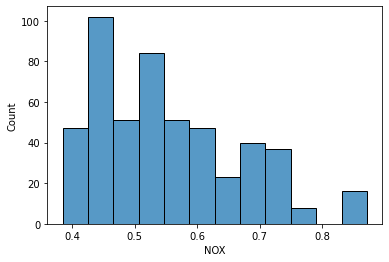

In [21]:
NOX = df['NOX']
sns.histplot(NOX)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NOX'>

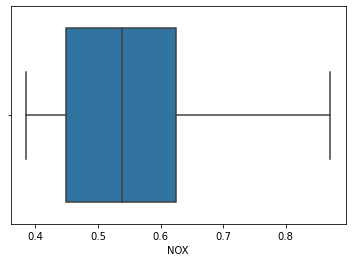

In [22]:
sns.boxplot(NOX)

In [23]:
NOX.describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

#### Interpretation:
* The distribution of proportion of nitric oxide concentration shows a right skewed graph as seen by the boxplot. * * * There are also no outliers identified.
* The shape of the graph can be further seen from the larger mean (0.554) compared to the median value (0.538)
* Although the difference might seem small, compared to the spread of the data set the 0.02 difference is significant.
* The boxplot further shows that the whole data spreadability and the dataset spreadability is relatively small:
    * Range : Max (0.871) - Min(0.385) = 0.486
    * Std : 0.115
    * IQR : IQR3(0.624) - IQR(0.449) = 0.175

<AxesSubplot:xlabel='RM', ylabel='Count'>

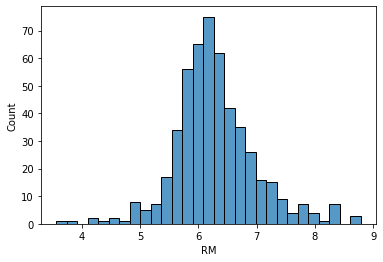

In [24]:
RM = df['RM']

sns.histplot(RM)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

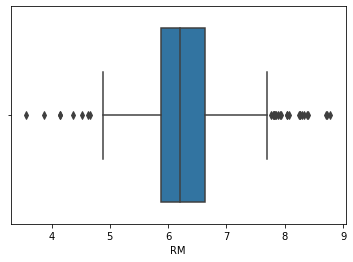

In [25]:
sns.boxplot(df['RM'])

In [26]:
RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

#### Interpretation:
* The distribution of proportion of the average number of rooms shows a normal distribution with a bell shape.
* The difference between the mean and the median is very small (6.284 and 6.208)
* The boxplot further shows that the whole data and the dataset spreadability is small, as seen below:
    * Range : Max (8.78) - Min(3.56) = 3.22
    * Std : 0.70
    * IQR : IQR3(6.62) - IQR(5.88) = 0.74

<AxesSubplot:xlabel='AGE', ylabel='Count'>

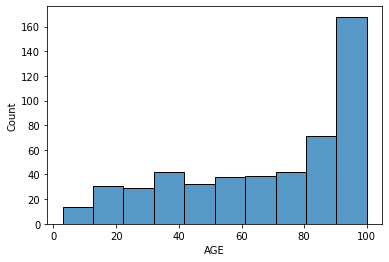

In [27]:
AGE = df['AGE']

sns.histplot(AGE)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

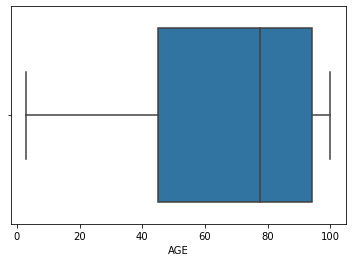

In [28]:
sns.boxplot(AGE)

In [29]:
AGE.describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

#### Interpretation:
* The distribution of proportion of the owner occupied units shows a left skewed graph with no outliers
* This can be further seen from the smaller mean (68.57) compared to the median value (77.5)
* The boxplot further shows that the whole data and the dataset spreadability is quite large seeing from:
    * Range : Max (100) - Min(2.9) = 97.1
    * Std : 28.148
    * IQR : IQR3(94.075) - IQR(45.025) = 49.050

<AxesSubplot:xlabel='DIS', ylabel='Count'>

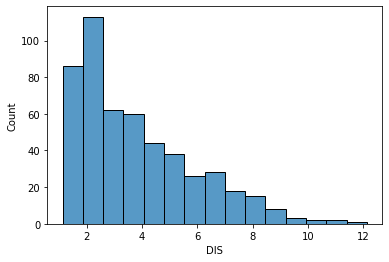

In [30]:
DIS = df['DIS']
sns.histplot(DIS)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

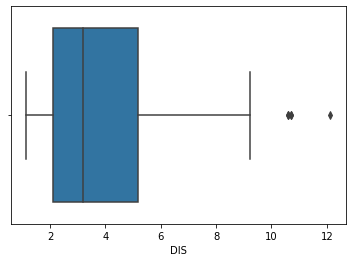

In [31]:
sns.boxplot(DIS)

In [32]:
DIS.describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

#### Interpretation:
* The distribution of weighted distances to five Boston employment centres shows a right skewed graph as seen by the boxplot. There are also outliers observed on the right tail side.
* The shape of the graph can be further seen from the larger mean (3.795) compared to the median value (3.207)
* The boxplot further shows that the whole data spreadability is not very large but is substantially larger than the dataset spreadability:
    * Range : Max (12.126) - Min(1.129) = 10.997
    * Std : 2.1057
    * IQR : IQR3(5.18) - IQR(2.1) = 3.08

<AxesSubplot:>

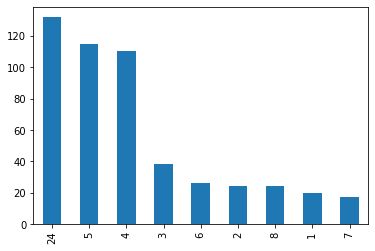

In [33]:
df['RAD'].value_counts().plot.bar()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RAD'>

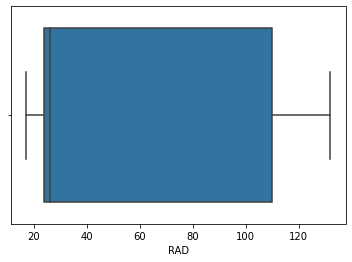

In [34]:
RAD = df['RAD']
sns.boxplot(RAD.value_counts())

In [35]:
RAD.describe()

count     506
unique      9
top        24
freq      132
Name: RAD, dtype: int64

#### Interpretation:
* The distribution of the index of accessibility to radial highways shows a left skewed graph as seen by the boxplot. There are also no outliers.
* The shape of the graph can be further seen from the larger mean (9.549) compared to the median value (5)
* The boxplot further shows that the whole data spreadability is not very large but the dataset spreadability is relatively large:
    * Range : Max (24) - Min(1) = 23
    * Std : 8.707
    * IQR : IQR3(24) - IQR(4) = 20
* The large spreadability of the dataset can be seen from the boxplot where the IQR 3 is the same with the maximum value

<AxesSubplot:xlabel='TAX', ylabel='Count'>

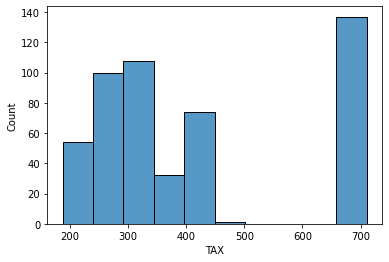

In [36]:
TAX = df['TAX']
sns.histplot(TAX)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TAX'>

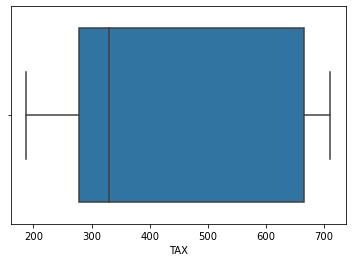

In [37]:
sns.boxplot(TAX)

In [38]:
TAX.describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

#### Interpretation:
* The distribution of  full-value property-tax rate per 10,000 Dollar shows a right skewed graph as seen by the boxplot. There are no outliers observed.
* The shape of the graph can be further seen from the larger mean (408.237) compared to the median value (330)
* The boxplot further shows that the whole data spreadability and the dataset spreadability is very large:
    * Range : Max (711) - Min(187) = 524
    * Std : 168.537
    * IQR : IQR3(666) - IQR(279) = 387

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

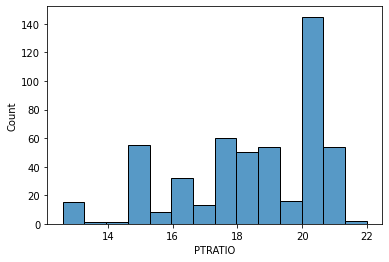

In [39]:
PTRATIO = df['PTRATIO']
sns.histplot(PTRATIO)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTRATIO'>

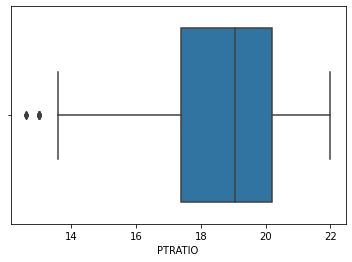

In [40]:
sns.boxplot(PTRATIO)

In [41]:
PTRATIO.describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

#### Interpretation:
* The distribution of  pupil teacher ratio by town shows a left skewed graph as seen by the boxplot. There are outliers observed on the left tail.
* The shape of the graph can be further seen from the smaller mean (18.45) compared to the median value (19.05)
* The boxplot further shows that the whole data spreadability and the dataset spreadability is relatively small:
    * Range : Max (22) - Min(12.6) = 9.4
    * Std : 2.1649
    * IQR : IQR3(20.2) - IQR(17.4) = 2.8

<AxesSubplot:xlabel='B', ylabel='Count'>

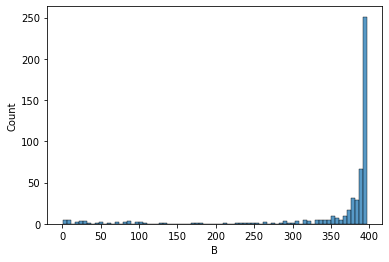

In [42]:
B = df['B']
sns.histplot(B)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='B'>

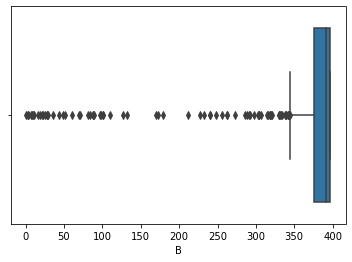

In [43]:
sns.boxplot(B)

In [44]:
B.describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

#### Interpretation:
* The distribution of Blacks by town shows a left skewed graph. There are many outliers observed on the left tail.
* The shape of the graph can be further seen from the smaller mean (356.67) compared to the median value (391.4)
* The boxplot further shows that the whole data spreadability and the dataset spreadability is very large:
    * Range : Max (396.9) - Min(0.32) = 396.58
    * Std : 91.29
    * IQR : IQR3(396.22) - IQR(375.377) = 20.843

<AxesSubplot:xlabel='LSTAT', ylabel='Count'>

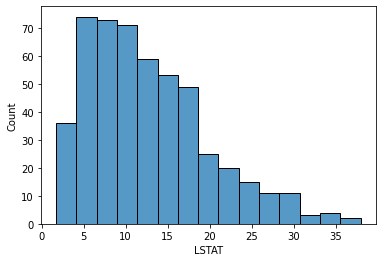

In [45]:
LSTAT = df['LSTAT']

sns.histplot(LSTAT)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

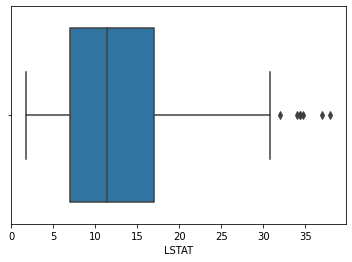

In [46]:
sns.boxplot(df['LSTAT'])

In [47]:
LSTAT.describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

#### Interpretation:
* The distribution of percentage of lower status of the population shows a right skewed graph as seen by the boxplot. There are outliers observed on the right tail.
* The shape of the graph can be further seen from the larger mean (12.65) compared to the median value (11.36)
* The boxplot further shows that the whole data spreadability is not very large but the dataset spreadability is very small:
    * Range : Max (37.97) - Min(1.73) = 36.24
    * Std : 7.14
    * IQR : IQR3(16.95) - IQR(6.95) = 10

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

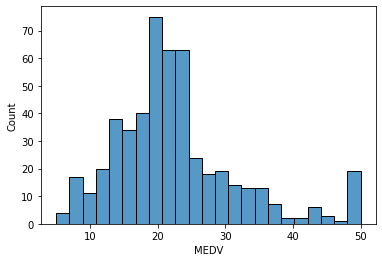

In [48]:
sns.histplot(df['MEDV'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

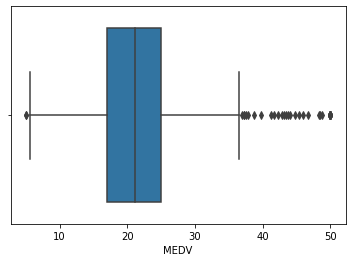

In [49]:
sns.boxplot(df['MEDV'])

In [50]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

#### Interpretation:
* The distribution of Median value of owner-occupied homes in 1000 Dollars shows a normal distribution. There are many outliers observed on the right tail and a single outlier on the left tail.
* The shape of the graph can be further seen from the mean (22.53) value which is similar to the median value (21.2)
* The boxplot further shows that the whole data spreadability is relatively large but the dataset spreadability is small:
    * Range : Max (50) - Min(5) = 45
    * Std : 9.19
    * IQR : IQR3(25) - IQR1(17) = 8

### 3. Conduct bi-variate analysis, including correlation tests and scatterplots and describe your findings. Are any of the predictors associated with per capita crime rate? If so, explain the relationship.
* Correlation test
* Scatterplot
* Relationship Analysis to Crime Rate (CRIM)

#### Correlation

In [51]:
df.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087,0.333461


#### To get a better visual on the correlations I chose to display it on a heatmap

<AxesSubplot:>

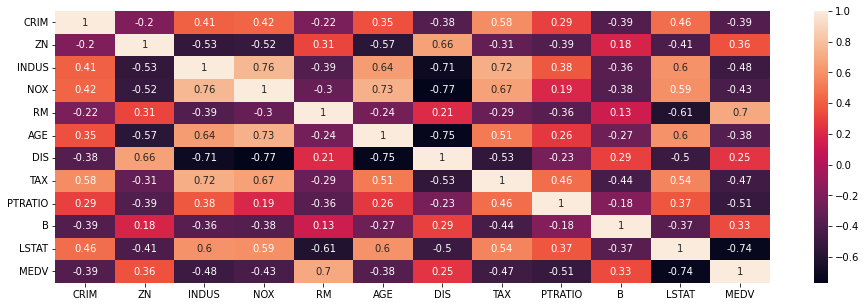

In [52]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(), annot = True)

### To see the bivariate relationship:

#### I decided to split the variables between numerical and categorical. Numerical will be visualised in scatterplot and categorical will be displayed in a boxplot.

In [53]:
num_var = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','LSTAT','B','MEDV']
cat_var = ['RAD','CHAS']

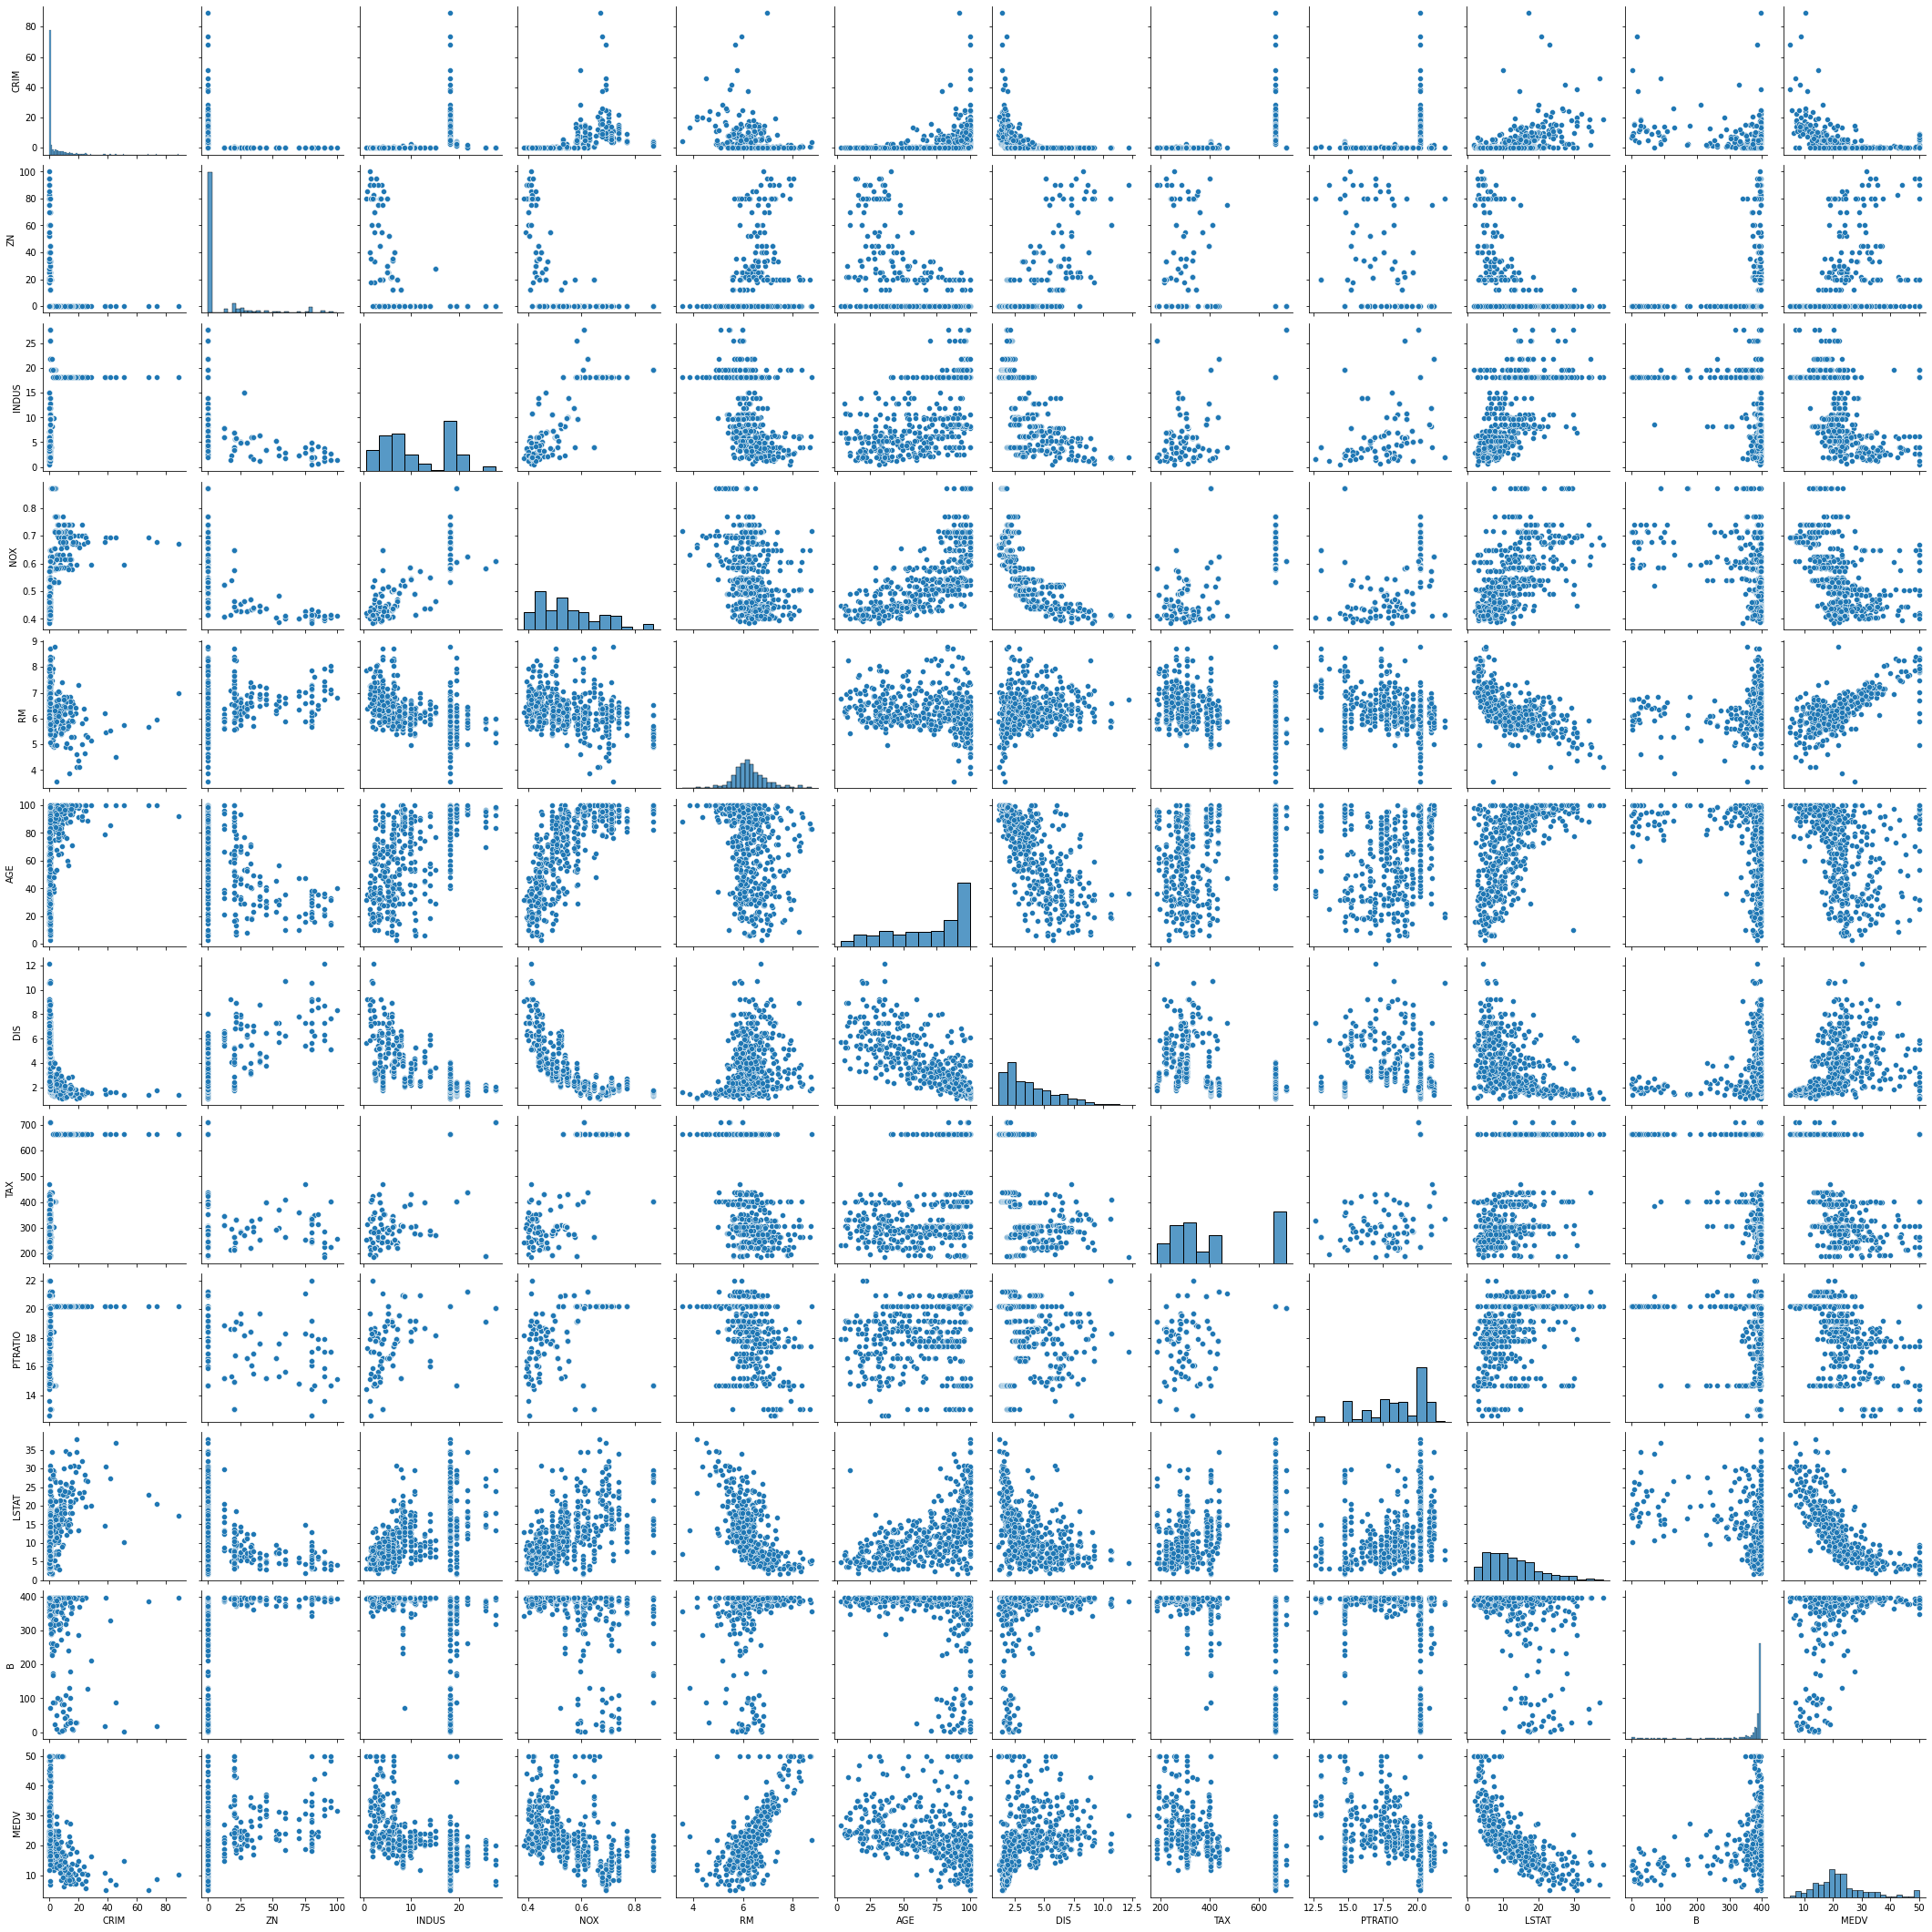

In [54]:
sns.pairplot(df[num_var])

#### Note:
* There are variables that shows strong correlation with each other:
    * INDUS and NOX
    * INDUS and AGE
    * INDUS and TAX
    * INDUS and LSTAT
    * INDUS and DIS
    * NOX and AGE
    * NOX and DIS
    * NOX and TAX
    * NOX and LSTAT
    * RM and LSTAT
    * AGE and ZN
    * AGE and LSTAT
    * AGE and TAX
    * AGE and DIS
    * DIS and ZN
    * DIS and TAX
    * PTRATIO and MEDV
    * LSTAT and MEDV
    
    
* the variables do not show a linear relationship albeit some do show a hint of linearity. These helps to explain the relationship between the variables.

#### For the categorical variable

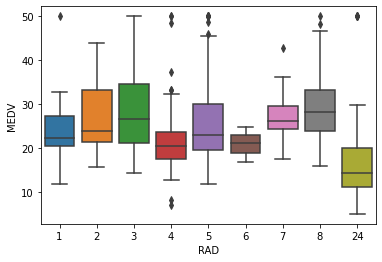

In [55]:
cat = pd.concat([df['RAD'],df['CHAS'],df['MEDV']],axis=1)
box = sns.boxplot(x='RAD', y="MEDV", data=cat)

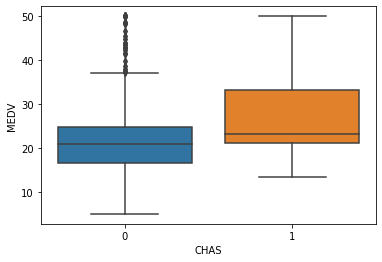

In [56]:
box = sns.boxplot(x='CHAS', y="MEDV", data=cat)

#### Seeing that the RAD variable has a lot of categories, I do not wish to include RAD into the linear regression model. On the other hand, I will use CHAS variable for the model.

### To see the relationship between other variables and Crime Rate:

In [57]:
x_vars = df.columns.drop('CRIM')
crim = df['CRIM']

In [58]:
import pandas as pd
import numpy as np
from scipy import stats

def statistics (df, target_col):
    corr = []
    p_value = []
    
    for col in df.columns:
        corr_, p_value_ = stats.pearsonr(df[col], df[target_col])
        corr.append(corr_)
        p_value.append(p_value_)
        
    df_corr_pval = pd.DataFrame({'corr': corr, 'p_value': p_value}, index=df.columns)
    return df_corr_pval

# Example usage

crim_stats = statistics(df, 'CRIM')
crim_stats


,corr,p_value
CRIM,1.000000,0.000000e+00
ZN,-0.200469,5.506472e-06
INDUS,0.406583,1.450349e-21
CHAS,-0.055892,2.094345e-01
NOX,0.420972,3.751739e-23
RM,-0.219247,6.346703e-07
AGE,0.352734,2.854869e-16
DIS,-0.379670,8.519949e-19
RAD,0.625505,2.693844e-56
TAX,0.582764,2.357127e-47


#### To see the relationship between CRIM and the other predictors more clearly, I will showcase them in a scatterplot.

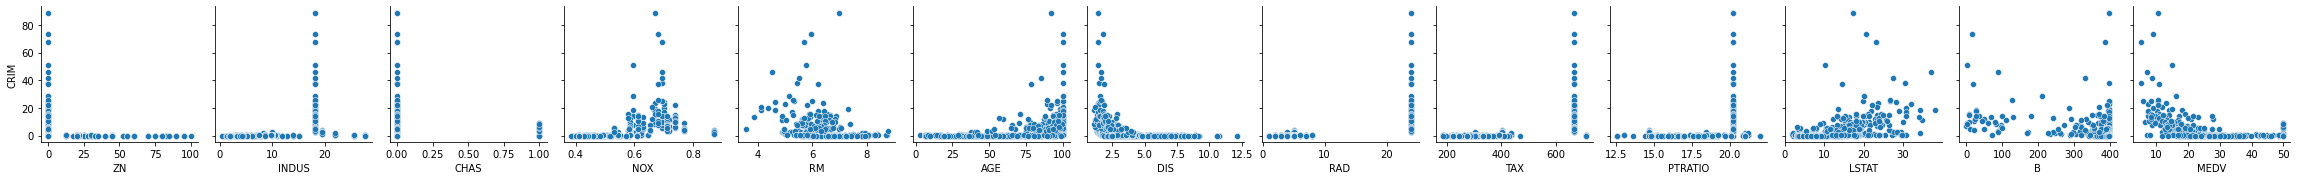

In [59]:
sns.pairplot(x_vars = ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','B','MEDV'], y_vars=['CRIM'], data= df)

#### Predictors Associated with Per Capita Crime Rate:
* As seen by the scatterplots, most of the predictors does not show linearity with CRIM.
* If we look at the pearson correlation, there are also no variables with a strong correlation (>0.7) with the variable CRIM. The strongest correlation is with RAD (which is the distance to radial highway). 
* But we can see some sort of relationship between crime rate and housing prices. From the plot we can see that they have some sort of strong negative relationship, where the higher the housing price the lesser the crime per capita rate. 

### To see the Relationship between the Predictors and the Target Variable (MEDV)

In [60]:
MEDV_Corr=statistics(df,'MEDV')
MEDV_Corr

,corr,p_value
CRIM,-0.388305,1.173987e-19
ZN,0.360445,5.713584e-17
INDUS,-0.483725,4.900260e-31
CHAS,0.175260,7.390623e-05
NOX,-0.427321,7.065042e-24
RM,0.695360,2.487229e-74
AGE,-0.376955,1.569982e-18
DIS,0.249929,1.206612e-08
RAD,-0.381626,5.465933e-19
TAX,-0.468536,5.637734e-29


#### From the correlation we can see that certain variable have very high correlation with the target variable such as:
    * LSTAT (strong and negatively correlated)

Before splitting the data, I decided to use a dummy variable to 'translate' or one hot encode the ordinal data of RAD so that it can be interpreted by the model. Furthermore, the function of the dummies model is to act as a baseline for us to include all the base features. 

In [61]:
col_df=['RAD'] #dummies variables

In [62]:
dummies=pd.get_dummies(df,columns=col_df,drop_first=True) 

dummies

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,21.6,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,34.7,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,33.4,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,36.2,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,...,9.67,22.4,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,...,9.08,20.6,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,...,5.64,23.9,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,...,6.48,22.0,0,0,0,0,0,0,0,0


#### Since the target variable is the housing price, we set the y as the MEDV.

However it is important to see if our dependent/target variable follows the assumption of being a normal distribution. Therefore, we will plot it in a histogram and qq plot.

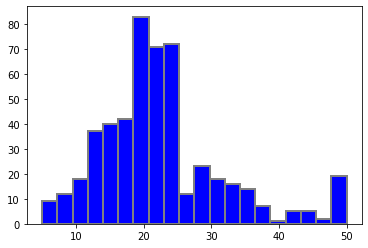

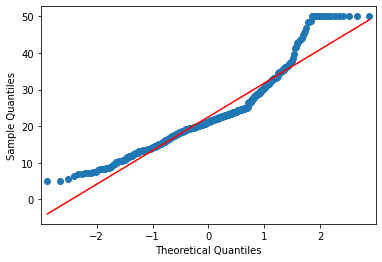

In [63]:
import statsmodels.api as sam
#Histogram
plt.hist(df['MEDV'], bins=20, color="blue", edgecolor='gray', linewidth=2)
plt.show()

#QQ plot
fig=sam.qqplot(df.MEDV[~df.MEDV.isna()],line='s')

Although not exact, we can roughly say that the dependent variable does follow a normal distribution. Thus I presume that although it may be present, our regression analyses will not be subjected to extreme bias and inaccuracies.

Text(0.5, 1.0, 'MEDV Square Root')

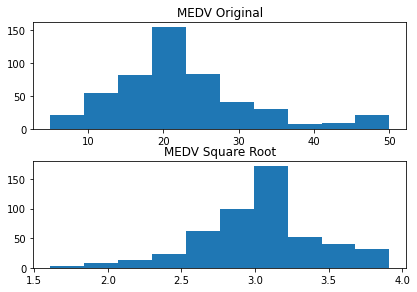

In [64]:
## Transforming the Target Variable

medv = df.loc[:,['MEDV']]

medv_log = np.log(medv)

fig,axs = plt.subplots(2)
fig.tight_layout()

axs[0].hist(medv)
axs[0].set_title('MEDV Original')
axs[1].hist(medv_log)
axs[1].set_title('MEDV Square Root')

### Feature Selection using Decision Tree

I am using Decission Tree to weed out the features and keep the ones deemed important. This is to be more efficient.

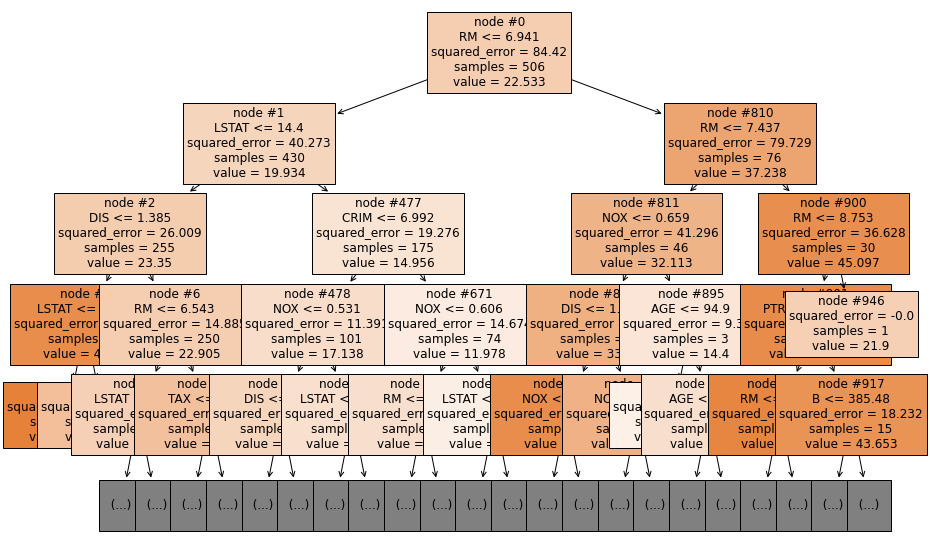

In [65]:
#Feature Selection using Decision Tree (manual one/ Elbow )
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree

x = df.drop(['MEDV'],axis = 1)
y = df.MEDV

decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(x,y)
features = list(x.columns)

plt.figure(figsize=(15,10))
plot_tree(decision_regressor, max_depth=4, feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Importance'>

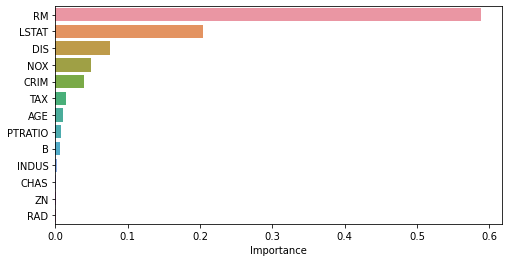

In [66]:
importances = decision_regressor.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 4))
sns.barplot(importance_df.Importance,importance_df.index)

* From the decision tree we can see that the RM is the most important feature
* From here we can also see that the RAD is not helpful, so one hot encoding it does not make any sense as well. 

Thus, the baseline features I will be using are RM, LSTAT, DIS, NOX, CRIM, TAX, AGE, PTRATIO, B

### Transforming and Scaling Variables

If the variable distribution does not follow normal distributions we need to fix it. That's why we also need to transform the data if it's very skewed. The assumption of building multilinear regression is that they have normal distribution. 

To transform the data I will be using logarithmic transformation and square root transformation.

As the variable RM is more or less normally distributed, I will not transform that. However, the rest needs to be transformed.

Text(0.5, 1.0, 'LSTAT Cubic Root')

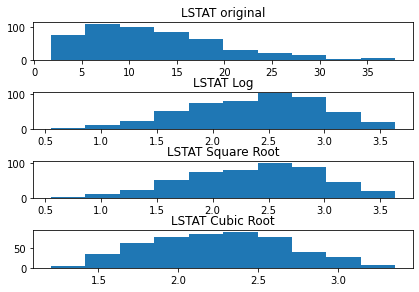

In [67]:
%matplotlib inline

fig,axs = plt.subplots(4)
fig.tight_layout()

lstat = df.loc[:,['LSTAT']]
axs[0].hist(lstat)
axs[0].set_title ('LSTAT original')

#transform with log
lstat_log = np.log(lstat)
axs[1].hist(lstat_log)
axs[1].set_title ('LSTAT Log')

#transform with square root
lstat_sqrt = np.sqrt(lstat)
axs[2].hist(lstat_log)
axs[2].set_title ('LSTAT Square Root')

#transform with cuberoot
lstat_cbrt = np.cbrt(lstat)
axs[3].hist(lstat_cbrt)
axs[3].set_title ('LSTAT Cubic Root')


In here it shows that LSTAT as it is quite heavily skewed is appropriate to transform using logarithmic transformation.

#### Variables transformed using logarithmic transformation:


Text(0.5, 1.0, 'DIS Log')

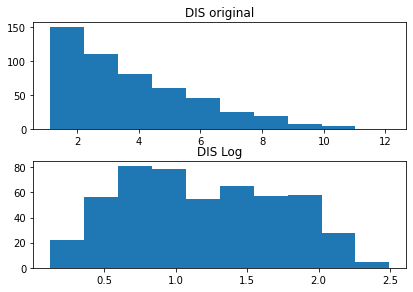

In [68]:
fig,axs = plt.subplots(2)
fig.tight_layout()

#DIS
dis = df.loc[:,['DIS']]
axs[0].hist(dis)
axs[0].set_title ('DIS original')
#transform with logarithm
dis_log = np.log(dis)
axs[1].hist(dis_log)
axs[1].set_title ('DIS Log')

Text(0.5, 1.0, 'NOX Log')

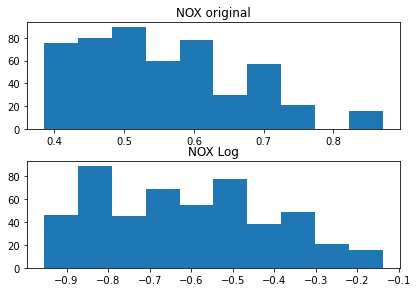

In [69]:
fig,axs = plt.subplots(2)
fig.tight_layout()

#NOX
nox = df.loc[:,['NOX']]
axs[0].hist(nox)
axs[0].set_title ('NOX original')

#transform with logarithm
nox_log = np.log(nox)
axs[1].hist(nox_log)
axs[1].set_title ('NOX Log')

Text(0.5, 1.0, 'CRIM Log')

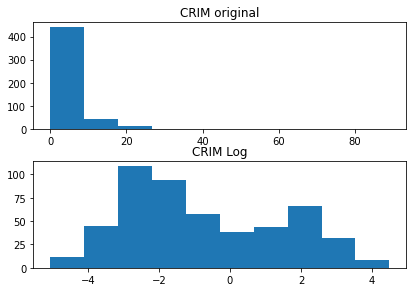

In [70]:
fig,axs = plt.subplots(2)
fig.tight_layout()

#CRIM
crim = df.loc[:,['CRIM']]
axs[0].hist(crim)
axs[0].set_title ('CRIM original')

crim_log = np.log(crim)
axs[1].hist(crim_log)
axs[1].set_title ('CRIM Log')

Text(0.5, 1.0, 'TAX Log')

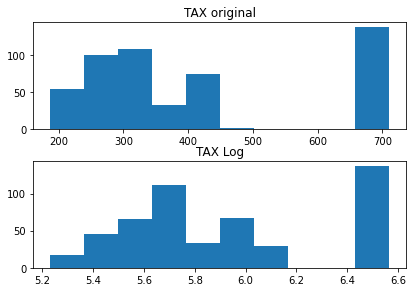

In [71]:
fig,axs = plt.subplots(2)
fig.tight_layout()

#TAX
tax = df.loc[:,['TAX']]
axs[0].hist(tax)
axs[0].set_title ('TAX original')

tax_log = np.log(tax)
axs[1].hist(tax_log)
axs[1].set_title ('TAX Log')

I believe that these three variables skewedness (AGE, PTRATIO, B) will not heavily influence the prediction of price. Therefore, I will not use the transformed data. However, I will still show how the transformations does not affect the distribution as well.

Text(0.5, 1.0, 'AGE Log')

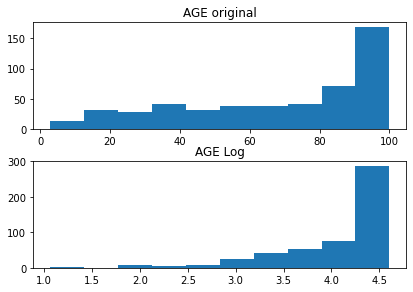

In [72]:
fig,axs = plt.subplots(2)
fig.tight_layout()

age = df.loc[:,['AGE']]
axs[0].hist(age)
axs[0].set_title ('AGE original')

age_log = np.log(age)
axs[1].hist(age_log)
axs[1].set_title ('AGE Log')

# from the two plots, we can see there is no significant difference
# however as I do not think that skewedness in AGE will impact the price prediction

Text(0.5, 1.0, 'PTRATIO Square Root')

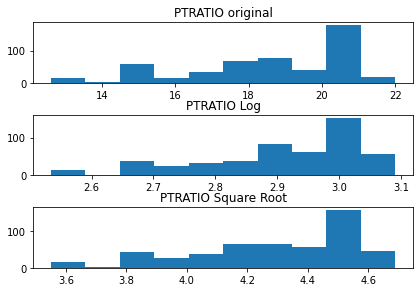

In [73]:
fig,axs = plt.subplots(3)
fig.tight_layout()

ptratio = df.loc[:,['PTRATIO']]
axs[0].hist(ptratio)
axs[0].set_title ('PTRATIO original')

ptratio_log = np.log(ptratio)
axs[1].hist(ptratio_log)
axs[1].set_title ('PTRATIO Log')

ptratio_sqrt = np.sqrt(ptratio)
axs[2].hist(ptratio_sqrt)
axs[2].set_title ('PTRATIO Square Root')



Text(0.5, 1.0, 'B Log')

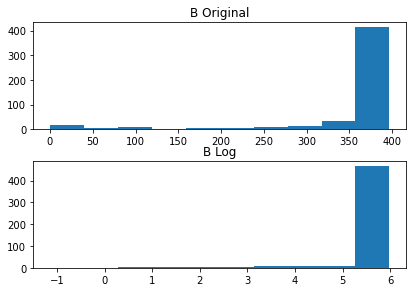

In [74]:
#B
fig,axs = plt.subplots(2)
fig.tight_layout()

b = df.loc[:,['B']]
axs[0].hist(b)
axs[0].set_title('B Original')

b_log = np.log(b)
axs[1].hist(b_log)
axs[1].set_title ('B Log')


#### Replacing the transformed data into the dataset

In [75]:
df1 = df.copy()

#replace the variables
df1['LSTAT'] = lstat_cbrt
df1['DIS'] = dis_log
df1['NOX'] = nox_log
df1['CRIM'] = crim_log
df1['TAX'] = tax_log
df1['B'] = b_log
df1['AGE'] = age_log
df1['PTRATIO']= ptratio_log
df1['MEDV'] = medv_log
#check the head
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,2.31,0,-0.619897,6.575,4.177459,1.408545,1,5.690359,2.727853,5.983684,1.707693,3.178054
1,-3.600502,0.0,7.07,0,-0.757153,6.421,4.368181,1.602836,2,5.488938,2.879198,5.983684,2.090814,3.072693
2,-3.601235,0.0,7.07,0,-0.757153,7.185,4.112512,1.602836,2,5.488938,2.879198,5.973377,1.591360,3.546740
3,-3.430523,0.0,2.18,0,-0.780886,6.998,3.824284,1.802073,3,5.402677,2.928524,5.977949,1.432570,3.508556
4,-2.672924,0.0,2.18,0,-0.780886,7.147,3.992681,1.802073,3,5.402677,2.928524,5.983684,1.746797,3.589059


### Scaling the data

I will be using standardisation to scale the data as to ensure that the logarithmic transformation does not mess up my data. I will be using min and max scaler as to not reduce the importance of my outliers.

In [76]:
from sklearn import preprocessing

x = df1.drop(['MEDV'],axis = 1)
y = df1.MEDV

scaler= preprocessing.MinMaxScaler()
scaler.fit(x)

x_scaled = scaler.fit_transform(x)

data= pd.DataFrame(x_scaled, columns=x.columns)
data

MEDV = df['MEDV']
df2 = pd.concat([data,MEDV],axis=1)
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.409867,0.577505,0.879193,0.542096,0.000000,0.343863,0.348358,1.000000,0.234761,24.0
1,0.153211,0.00,0.242302,0.0,0.241744,0.547998,0.933063,0.623954,0.043478,0.193049,0.619906,1.000000,0.412080,21.6
2,0.153134,0.00,0.242302,0.0,0.241744,0.694386,0.860849,0.623954,0.043478,0.193049,0.619906,0.998553,0.180918,34.7
3,0.171005,0.00,0.063050,0.0,0.212673,0.658555,0.779439,0.707895,0.086957,0.128462,0.708405,0.999195,0.107426,33.4
4,0.250315,0.00,0.063050,0.0,0.212673,0.687105,0.827003,0.707895,0.086957,0.128462,0.708405,1.000000,0.252859,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.240099,0.00,0.420455,0.0,0.487069,0.580954,0.895602,0.331081,0.000000,0.283298,0.916533,0.998252,0.430434,22.4
502,0.206118,0.00,0.420455,0.0,0.487069,0.490324,0.925075,0.297277,0.000000,0.283298,0.916533,1.000000,0.409958,20.6
503,0.236926,0.00,0.420455,0.0,0.487069,0.654340,0.973362,0.274575,0.000000,0.283298,0.916533,1.000000,0.268238,23.9
504,0.298671,0.00,0.420455,0.0,0.487069,0.619467,0.968036,0.315551,0.000000,0.283298,0.916533,0.998774,0.307261,22.0


### Splitting Data 80:20

I will base the selected features by the decision tree. Therefore the features are:

RM, LSTAT, DIS, NOX, CRIM, TAX, AGE, PTRATIO, B  

The variables I will drop for the baseline model are:
INDUS, CHAS, ZN ,RAD

In [77]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

In [78]:
X = df2.drop(['MEDV','INDUS','CHAS','ZN','RAD'], axis=1)
y = df2.MEDV
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state= 0)

print (X_train.shape,y_train.shape)
print (X_test.shape, y_test.shape)

(404, 9) (404,)
(102, 9) (102,)


### Baseline Model

In [79]:
import statsmodels.api as sm
X=sm.add_constant(X_train)
df2_fit = sm.OLS(y_train,X).fit()

print(df2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          6.23e-132
Time:                        19:08:48   Log-Likelihood:                -1145.5
No. Observations:                 404   AIC:                             2311.
Df Residuals:                     394   BIC:                             2351.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2179      3.667      9.876      0.0

In [80]:
X = df2.drop(['MEDV','INDUS','CHAS','ZN','RAD'], axis=1)
y = df2.MEDV

def performance(x,y):
    from sklearn import datasets, linear_model
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
    from sklearn.model_selection import train_test_split
    import statsmodels.api as sm
    from scipy import stats
    
    x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)
    lr = LinearRegression()
    lr.fit(x,y)

    train_pred = lr.predict(x_train)
    test_pred = lr.predict(x_test)
    
    #training 
    MSE_train = mean_squared_error(y_train, train_pred)
    R2_train = r2_score(y_train, train_pred)
    RMSE_train = np.sqrt(MSE_train)
    MAE_train = mean_absolute_error(y_train, train_pred)
    MAPE_train = metrics.mean_absolute_percentage_error(y_train,train_pred)

    #testing
    MSE_test = mean_squared_error(y_test, test_pred)
    R2_test = r2_score(y_test, test_pred)
    RMSE_test = np.sqrt(MSE_test)
    MAE_test = mean_absolute_error(y_test, test_pred)
    MAPE_test = metrics.mean_absolute_percentage_error(y_test,test_pred)
    
    performance = pd.DataFrame({'Test Metrics':[MSE_test, R2_test, RMSE_test, MAE_test, MAPE_test],'Train Metrics':[MSE_train, R2_train, RMSE_train, MAE_train, MAPE_train],'Diff (train - test)':[MSE_train - MSE_test, R2_train - R2_test, RMSE_train - RMSE_test, MAE_train - MAE_test, MAPE_train - MAPE_test]},index=['MSE','R2','RMSE','MAE','MAPE'])
    return performance

performance(X,y)

,Test Metrics,Train Metrics,Diff (train - test)
MSE,16.573109,19.883230,3.310121
R2,0.825601,0.756715,-0.068887
RMSE,4.071008,4.459062,0.388053
MAE,2.768047,3.246454,0.478407
MAPE,0.143272,0.167244,0.023972


#### Note:
* From the performance we can see that the Rsquared is pretty good at 80%
* The RMSE and MAE is not very different however their difference is preety high.
* We can also see from the p-value that AGE does not have a strong predictive power. 


### 5. Explain potential complications of using train_test_split function in terms of reproducibility

#### The potential complications are:
* The train_test_split function splits data pseudorandomly which allows it to reproduce data but at the same time, as some parts are chosen differently it may also change the performance of the training model. There are two possible issues:
    *  If the training and testing set may be too similar that the model becomes unable to predict data accurately as it memorizes the training set. This instance is known as overfitting.
    * If the training and testing set may be too different that the model becomes unusable and predicting data becomes widely inaccurate. This instance is also knows as underfitting.
    
* However we can resolve these issues by the folllowing method:
    * Overfitting: we can regularize the model using either Lasso or Ridge method.
    * Underfitting : we can retrain the model or create more complex features to train the model with.

### 6. Check to see if there is any multicollinearity. If yes, remove features that can be a potential problem when building a linear regression to predict housing prices.

To further check on multicollinearity, we will check the VIF values of the baseline model. VIF can help to identify multicollinearity in a variable as well as a variable's dependency on others. It is important to note that rather than high correlation with each other, certain variables may complement each other. Thus, further analysis on VIF values is needed.

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif (dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF Score'] = [variance_inflation_factor(dataset.values,i) for i in range (len(dataset.columns))]
    return vif

In [82]:
#set the features
df2_selected = df2.drop(['INDUS','CHAS','ZN','RAD'], axis=1)

print(df2_selected.head())
get_vif(df2_selected)

       CRIM       NOX        RM       AGE       DIS       TAX   PTRATIO  \
0  0.000000  0.409867  0.577505  0.879193  0.542096  0.343863  0.348358   
1  0.153211  0.241744  0.547998  0.933063  0.623954  0.193049  0.619906   
2  0.153134  0.241744  0.694386  0.860849  0.623954  0.193049  0.619906   
3  0.171005  0.212673  0.658555  0.779439  0.707895  0.128462  0.708405   
4  0.250315  0.212673  0.687105  0.827003  0.707895  0.128462  0.708405   

          B     LSTAT  MEDV  
0  1.000000  0.234761  24.0  
1  1.000000  0.412080  21.6  
2  0.998553  0.180918  34.7  
3  0.999195  0.107426  33.4  
4  1.000000  0.252859  36.2  


,Features,VIF Score
0,CRIM,25.667775
1,NOX,21.838039
2,RM,33.254737
3,AGE,54.543348
4,DIS,15.252659
5,TAX,13.072066
6,PTRATIO,14.252458
7,B,70.601182
8,LSTAT,25.282292
9,MEDV,25.742986


#### Note:
* From the VIF score we can see that all of the variables have very high multicollinearity. However, we can see that B and AGE has abnormally high values.

#### The easiest way to decrease the VIF score is by removing the variables. However, to do it blindly will not be good for our model. Thus, we need to see the nature of these variables and determine if they have interactions or if we can drop them. 

* To make sense of the variables above I try to see if they are logically affecting housing prices. 

    * CRIM or criminal rate for sure will impact the housing prices as areas that are deemed dangerous will definitely have lower housing price.
  
    * For NOX (nitric oxide concentration), the higher the concentration may indicate high level of emission be it from industrial or organisms. However, in this housing context we can say that NOX is related to industrial so it makes sense that DIS and NOX may have multicollinearity.
    
    * Related with the point above, distance to industries is logically related to NOX.

I want to check the correlation between the rest of the variables to see if there are any plausible multicollinearity.

In [83]:
df2_selected.corr()

,CRIM,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.806988,-0.306943,0.554640,-0.743926,0.809977,0.366308,-0.390885,0.615171,-0.454302
NOX,0.806988,1.000000,-0.304521,0.677214,-0.860018,0.668307,0.202592,-0.290522,0.606745,-0.430806
RM,-0.306943,-0.304521,1.000000,-0.207919,0.256584,-0.299214,-0.356109,0.077150,-0.652767,0.695360
AGE,0.554640,0.677214,-0.207919,1.000000,-0.687310,0.410368,0.205649,-0.179458,0.552720,-0.326512
DIS,-0.743926,-0.860018,0.256584,-0.687310,1.000000,-0.599621,-0.215174,0.247961,-0.547898,0.292316
TAX,0.809977,0.668307,-0.299214,0.410368,-0.599621,1.000000,0.412256,-0.360019,0.529807,-0.474701
PTRATIO,0.366308,0.202592,-0.356109,0.205649,-0.215174,0.412256,1.000000,-0.168481,0.394893,-0.503160
B,-0.390885,-0.290522,0.077150,-0.179458,0.247961,-0.360019,-0.168481,1.000000,-0.277695,0.283157
LSTAT,0.615171,0.606745,-0.652767,0.552720,-0.547898,0.529807,0.394893,-0.277695,1.000000,-0.797527
MEDV,-0.454302,-0.430806,0.695360,-0.326512,0.292316,-0.474701,-0.503160,0.283157,-0.797527,1.000000


From the table above, we can identify that the variables with very high correlations (>0.7) are:

    * CRIM - NOX (0.806)
    * CRIM-DIS(-0.74)
    * CRIM-TAX(0.809)
    * NOX -DIS(-0.86)
    * AGE-NOX(0.765)
    * AGE -DIS(-0.778)
Other variables with relatively high correlations are:
    
    * CRIM -AGE (0.658)
    * CRIM - LSTAT (0.615)
    * NOX - TAX (0.668)
    * NOX - LSTAT(0.606)
    * RM - LSTAT(-0.652)
    * RM - MEDV (0.695)
    * AGE - LSTAT (0.617)
    * DIS - TAX (-0.599)
    * DIS - LSTAT (-0.547)
    * TAX - LSTAT (0.529)
    
These are the attributes:

* CRIM - per capita crime rate by town
* NOX - nitric oxides concentration (parts per 10 million) // byproduct of organisms
* AGE - proportion of owner-occupied units built prior to 1940 // old houses
* DIS - weighted distances to five Boston employment centres //distance to employment centres
* TAX - full-value property-tax rate per 10,000 Dollar

#### We can also see the nature of their relationships by looking at the plot:

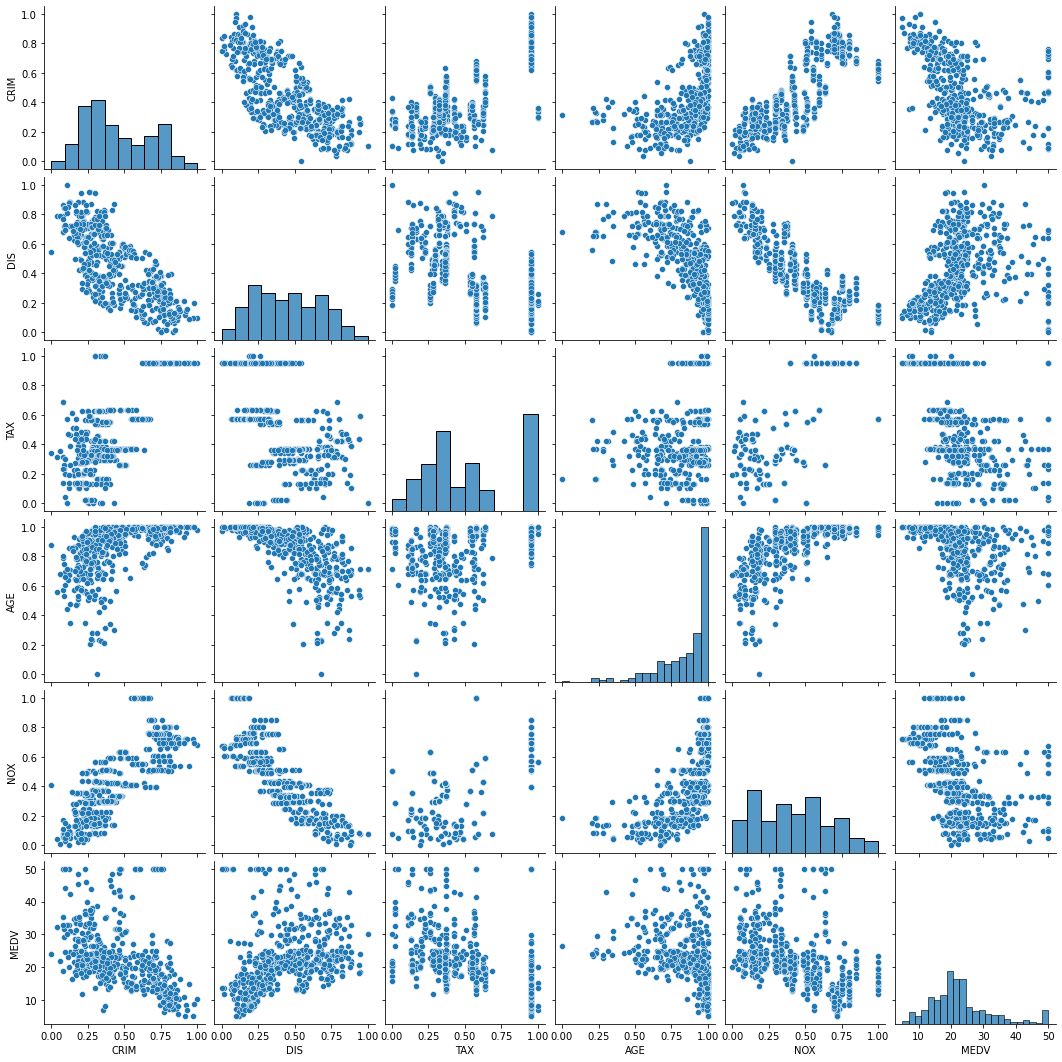

In [84]:
sns.pairplot(df2_selected[['CRIM','DIS','TAX','AGE','NOX','MEDV']])

Relationship analysis on the variables to determine whether the variables are redundant (too highly correlated or multicollinear) or complementary.

* CRIM - per capita crime rate by town
* NOX - nitric oxides concentration (parts per 10 million) // byproduct of organisms
* AGE - proportion of owner-occupied units built prior to 1940 // old houses
* DIS - weighted distances to five Boston employment centres //distance to employment centres
* TAX - full-value property-tax rate per 10,000 Dollar

------------------------------------------------------------------------
It is also observed that the variables above does not portray a linear relationship with the respond variable (MEDV). 

    * CRIM - NOX (0.806)
    * CRIM-DIS(-0.74)
    * CRIM-TAX(0.809)
    * NOX -DIS(-0.86)
    * AGE-NOX(0.765)
    * AGE -DIS(-0.778)
    
    
The closest thing to linearity to the target variable is the CRIM and DIS which indicates that the higher the housing price, the lower the crime rate. As well as the, higher the distance to employment centres the lower the housing price.

To address the plausible multicollinearity, we can either drop the variables we believe does not have predictive power or do interaction terms between them.


### 7. Build a linear regression model on the important features of the training set and make your interpretation on the results of the models. Provide a justification on why those selected features are important.

### Model 1 : Dropping AGE and B

As seen from the previous summary table, based on the VIF score above, the variable AGE which indicates old houses does not have high predictive power. Thus, I will drop it.

Also, B has a very high VIF value and a rather low correaltion to to the target variable. Hence I, will also drop it.

In [85]:
import statsmodels.formula.api as sm
f='MEDV ~ CRIM+DIS+TAX-AGE+NOX-B+LSTAT+PTRATIO+RM'
model_all = sm.ols(formula = f, data = df2_selected)
fitted = model_all.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     232.0
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          2.76e-152
Time:                        19:08:57   Log-Likelihood:                -1473.5
No. Observations:                 506   AIC:                             2963.
Df Residuals:                     498   BIC:                             2997.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.6677      2.257     19.351      0.0

In [86]:
x_model1 = df2_selected.drop(['MEDV','AGE','B'],axis = 1)
y_model1 = df2_selected.MEDV

print(x_model1.head())
performance(x_model1, y_model1)

       CRIM       NOX        RM       DIS       TAX   PTRATIO     LSTAT
0  0.000000  0.409867  0.577505  0.542096  0.343863  0.348358  0.234761
1  0.153211  0.241744  0.547998  0.623954  0.193049  0.619906  0.412080
2  0.153134  0.241744  0.694386  0.623954  0.193049  0.619906  0.180918
3  0.171005  0.212673  0.658555  0.707895  0.128462  0.708405  0.107426
4  0.250315  0.212673  0.687105  0.707895  0.128462  0.708405  0.252859


,Test Metrics,Train Metrics,Diff (train - test)
MSE,21.138263,19.477648,-1.660616
R2,0.753581,0.768220,0.014639
RMSE,4.597637,4.413349,-0.184288
MAE,3.277747,3.184179,-0.093568
MAPE,0.159178,0.166763,0.007585


* The accuracy of the model is at 76% which is not bad.
* The RMSE and MAE difference is really good and the MAPE difference is also really low.
* However, it's really suspicious how the testing set is higher than the training set.

Therefore, I will further tune my features based on the correlations of the variables.

For instance, the variables as follows:

    * CRIM - NOX (0.806)
    * CRIM-DIS(-0.74)
    * CRIM-TAX(0.809)
    * NOX -DIS(-0.86)
    * CRIM - LSTAT (0.615)
    * NOX - TAX (0.668)
    * NOX - LSTAT(0.606)
    * RM - LSTAT(-0.652)
    * DIS - TAX (-0.599)
    * DIS - LSTAT (-0.547)
    * TAX - LSTAT (0.529)

However, considering the logic and the relationship between the variables with the target. I wanted to add NOX-DIS because it makes sense that places with more people(closer to employment centres) have higher nitric oxide concentration.

Another interaction I believe makes sense is criminal rate and pupil teacher ratio(CRIM-PTRATIO). As educated society usually are less prone to commiting crimes (unless white collared crime but they're usually not considered as life threatening thus, not affecting housing price).

With these logic pattern, I will be deciding on the interaction terms as I tune the features and put them on the models.

#### Correlation to target variables

In [87]:
model1 = df2_selected.drop(['AGE','B'],axis=1)
statistics(model1, 'MEDV')

,corr,p_value
CRIM,-0.454302,3.898393e-27
NOX,-0.430806,2.782871e-24
RM,0.695360,2.487229e-74
DIS,0.292316,1.996984e-11
TAX,-0.474701,8.454301e-30
PTRATIO,-0.503160,7.910743e-34
LSTAT,-0.797527,1.073412e-112
MEDV,1.000000,0.000000e+00


In general, for dropping variables, I will be inclined to drop them if they have low correlation to the target variable and will improve the model.

However, in some cases where I think the variables are crucial for house price detection, I will keep it.

For instance, between RM and LSTAT I should be dropping LSTAT, however I believe that the percentage of low population plays a part in property price so rather than dropping it, I will explore other possible interactions with the variables.



### Model 2: Adding NOX_DIS

In [88]:
model2 = df2_selected.copy()
f='MEDV ~ CRIM+DIS+TAX-AGE+NOX-B+LSTAT+PTRATIO+RM+I(DIS*NOX)'
model_all = sm.ols(formula = f, data = model2)
fitted = model_all.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          3.03e-151
Time:                        19:08:57   Log-Likelihood:                -1473.1
No. Observations:                 506   AIC:                             2964.
Df Residuals:                     497   BIC:                             3002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.5178      2.468     18.041   

In [89]:
x_model2 = model2.drop(['MEDV','AGE','B'],axis = 1)
y_model2 = df2_selected.MEDV
model2['NOX_DIS'] = model2['NOX']*model2['DIS']

performance(x_model2,y_model2)

,Test Metrics,Train Metrics,Diff (train - test)
MSE,20.546887,19.626956,-0.919931
R2,0.785429,0.758174,-0.027256
RMSE,4.532867,4.430232,-0.102635
MAE,3.019898,3.249280,0.229382
MAPE,0.135386,0.172770,0.037385


We can see that by adding the interaction terms, there is not much signficiant difference to the model. Therefore I will not use NOX_DIS interaction.

### MODEL 3-1:  Drop NOX 

I decided to drop NOX because the interaction terms does not have any affect.

In [90]:
x_model3 = df2_selected.drop(['MEDV','AGE','NOX','B'],axis = 1)
y_model3 = df2_selected.MEDV
performance(x_model3, y_model3)

,Test Metrics,Train Metrics,Diff (train - test)
MSE,20.566764,21.138892,0.572128
R2,0.745776,0.752205,0.006429
RMSE,4.535059,4.597705,0.062646
MAE,2.937770,3.379325,0.441554
MAPE,0.144317,0.175792,0.031475


I see a better performance as the errors shrinks a little and the MAPE is still under 20. However, I will continue to add features.

### MODEL 3: DROP DIS

In [91]:
x_model3 = df2_selected.drop(['MEDV','AGE','DIS','B'],axis = 1)
y_model3 = df2_selected.MEDV
performance(x_model3, y_model3)

,Test Metrics,Train Metrics,Diff (train - test)
MSE,15.779797,24.589050,8.809253
R2,0.768283,0.721068,-0.047215
RMSE,3.972379,4.958735,0.986355
MAE,2.925960,3.578707,0.652747
MAPE,0.169036,0.177812,0.008776


Dropping NOX has a better outcome for my model (although by a thin line) thus, I will drop NOX.

My indicators are the value of errors in the testing metrics as well as the difference between the errors of testing set and training set.

### MODEL 4: ADD RM_LSTAT

In [92]:
model4 = df2_selected.copy()
x_model4 = model4.drop(['MEDV','AGE','NOX','B'],axis = 1)
y_model4 = model4.MEDV
model4['RM_LSTAT'] = model4['RM']*model4['LSTAT']
performance(x_model4, y_model4)

,Test Metrics,Train Metrics,Diff (train - test)
MSE,24.998981,20.019866,-4.979115
R2,0.752363,0.750184,-0.002178
RMSE,4.999898,4.474357,-0.525542
MAE,3.356029,3.273725,-0.082304
MAPE,0.164784,0.170625,0.005842


The addition of the interaction terms seems to fumble my model a little. Therefore I will explore further possible interaction terms.

Aside of that the difference in error and MAPE is relatively small so I am quite satisfied. However, as stated, further tuning is imperative.

### MODEL 5: ADD CRIM_PTRATIO

I decided to add CRIM-PTRATIO interaction because it makes sense to see that crime rate and education are closely tied together. When looking at the number crimes and pupils combined the property price are usually dependent on them. 

In [93]:
model5 = df2_selected.copy()
x_model5 = model5.drop(['MEDV','AGE','NOX','B'],axis = 1)
y_model5 = model5.MEDV
model5['CRIM_PTRATIO'] = model5['CRIM']*model5['PTRATIO']
performance(x_model5, y_model5)

,Test Metrics,Train Metrics,Diff (train - test)
MSE,18.059911,21.771810,3.711899
R2,0.809740,0.732259,-0.077482
RMSE,4.249695,4.666027,0.416332
MAE,3.106601,3.336699,0.230098
MAPE,0.151843,0.173892,0.022049


In [94]:
import statsmodels.formula.api as sm
f='MEDV ~ CRIM+DIS+TAX-AGE-NOX-B+LSTAT+PTRATIO+RM+I(CRIM*PTRATIO)'
model_all = sm.ols(formula = f, data = df2_selected)
fitted = model_all.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     218.6
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          2.05e-147
Time:                        19:08:57   Log-Likelihood:                -1485.0
No. Observations:                 506   AIC:                             2986.
Df Residuals:                     498   BIC:                             3020.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.0108      3.01

Adding the variables seems to improve my model a little. Despite the widened gap, the value of the errors in the testing set has decreased. Thus I wil keep this interaction.

## Model 6: ADD LSTAT_DIS

I decided to add this interaction because I believe that it logically makes sense that these two variables are tied together.

In [95]:
f='MEDV ~ CRIM+DIS+TAX-AGE-NOX-B+LSTAT+PTRATIO+RM+I(CRIM*PTRATIO)+I(LSTAT*DIS)'
model_all = sm.ols(formula = f, data = df2_selected)
fitted = model_all.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     198.4
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          2.35e-149
Time:                        19:08:57   Log-Likelihood:                -1477.6
No. Observations:                 506   AIC:                             2973.
Df Residuals:                     497   BIC:                             3011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            49.3657      3.28

In [96]:
model6 = model5.copy()
model6['CRIM_PTRATIO'] = model6['CRIM']*model6['PTRATIO']
model6['DIS_LSTAT'] = model6['LSTAT']*model6['DIS']
print(model6.head())

x_model6 = model6.drop(['NOX','AGE','MEDV','B'],axis=1)
y_model6 = model6['MEDV']

performance(x_model6,y_model6)

       CRIM       NOX        RM       AGE       DIS       TAX   PTRATIO  \
0  0.000000  0.409867  0.577505  0.879193  0.542096  0.343863  0.348358   
1  0.153211  0.241744  0.547998  0.933063  0.623954  0.193049  0.619906   
2  0.153134  0.241744  0.694386  0.860849  0.623954  0.193049  0.619906   
3  0.171005  0.212673  0.658555  0.779439  0.707895  0.128462  0.708405   
4  0.250315  0.212673  0.687105  0.827003  0.707895  0.128462  0.708405   

          B     LSTAT  MEDV  CRIM_PTRATIO  DIS_LSTAT  
0  1.000000  0.234761  24.0      0.000000   0.127263  
1  1.000000  0.412080  21.6      0.094976   0.257119  
2  0.998553  0.180918  34.7      0.094929   0.112885  
3  0.999195  0.107426  33.4      0.121141   0.076046  
4  1.000000  0.252859  36.2      0.177325   0.178998  


,Test Metrics,Train Metrics,Diff (train - test)
MSE,24.930313,18.923405,-6.006908
R2,0.680120,0.779758,0.099638
RMSE,4.993026,4.350104,-0.642922
MAE,3.637515,3.126551,-0.510964
MAPE,0.192992,0.161270,-0.031722


There seems to be an increase in the MAPE between the training and testing set. Plus, the other errors has also increased in the testing metrics. 

Thus, I willl not be including the interaction term LSTAT_DIS

### MODEL 7 : ADD RM_TAX

I decided to add another interaction between RM and TAX. This is because I believe the combination of rooms and tax indicates a higher price so it makes sense for the variables to be combined for house price prediction.

In [97]:
import statsmodels.formula.api as sm
f='MEDV ~ CRIM+DIS+TAX-AGE-NOX-B+LSTAT+PTRATIO+RM+I(CRIM*PTRATIO)+I(RM*TAX)'
model_all = sm.ols(formula = f, data = df2_selected)
fitted = model_all.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     223.2
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          3.92e-159
Time:                        19:08:57   Log-Likelihood:                -1454.6
No. Observations:                 506   AIC:                             2927.
Df Residuals:                     497   BIC:                             2965.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.7137      3.81

In [98]:
model7 = df2_selected.copy()
model7['CRIM_PTRATIO'] = model7['CRIM']*model7['PTRATIO']
model7['RM_TAX'] = model7['RM']*model7['TAX']
x_model7 = model7.drop(['MEDV','AGE','NOX','B'],axis = 1)
y_model7 = model7.MEDV

print(x_model7.head())
performance(x_model7, y_model7)

       CRIM        RM       DIS       TAX   PTRATIO     LSTAT  CRIM_PTRATIO  \
0  0.000000  0.577505  0.542096  0.343863  0.348358  0.234761      0.000000   
1  0.153211  0.547998  0.623954  0.193049  0.619906  0.412080      0.094976   
2  0.153134  0.694386  0.623954  0.193049  0.619906  0.180918      0.094929   
3  0.171005  0.658555  0.707895  0.128462  0.708405  0.107426      0.121141   
4  0.250315  0.687105  0.707895  0.128462  0.708405  0.252859      0.177325   

     RM_TAX  
0  0.198583  
1  0.105790  
2  0.134050  
3  0.084599  
4  0.088267  


,Test Metrics,Train Metrics,Diff (train - test)
MSE,18.415511,18.376279,-0.039233
R2,0.786344,0.781161,-0.005184
RMSE,4.291330,4.286756,-0.004574
MAE,3.080114,2.989289,-0.090826
MAPE,0.162252,0.156479,-0.005773


The addition of RM-TAX interaction terms increased the accuracy (about 78%) of the model by a little and the performance index is better than the previous model as seen by the RMSE, MAE, MAPE score and differences.

I will proceed with this model.

### Plotting Residual

#### Histogram 

In [99]:
mod = df2_selected.copy()
mod['CRIM_PTRATIO'] = mod['CRIM']*mod['PTRATIO']
mod['RM_TAX'] = mod['RM']*mod['TAX']
x_mod = mod.drop(['MEDV','AGE','NOX','B'],axis = 1)
y_mod = mod.MEDV

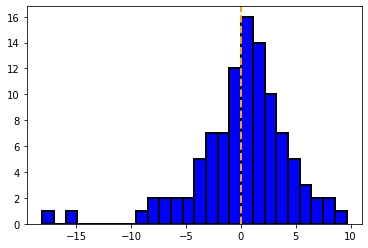

In [100]:

x = x_mod
y = y_mod


x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

lr = linear_model.LinearRegression()
lr = lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

diff = {'True values': y_test, 'Predicted values': y_pred}

dif = pd.DataFrame(data=diff)
dif['Difference'] = dif['Predicted values'] - dif['True values']

plt.hist(dif['Difference'], bins=26, color="blue", edgecolor='black', linewidth=2)
plt.axvline(0, color="orange", linestyle='dashed', linewidth=2)
plt.show()

#### QQ Plot

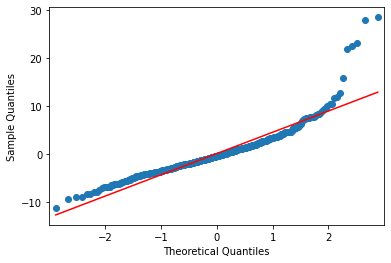

In [101]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
model = sm.OLS(y, x)
results = model.fit()

#extracting residuals
residuals = results.resid  
sm.qqplot(residuals, line='s') 
plt.show() 

From both of the plots we can see that the residual roughly follows a normal distribution however, there are still parts of the data that does not clearly follow the normal distribution. However, it is more or less alright. Because to follow normal distribution completely would be difficult.

### 8. Write the linear equation to predict the price of a house. Make interpretations on the regression coefficients

#### Linear equation: 
*  y = Intercept + Coefficient (x)

In [102]:
X = x_mod
Y = y_mod

lm= linear_model.LinearRegression()
final_model = lm.fit(X, Y)
print('intercept:', final_model.intercept_,'\n')
print('coefficient:', final_model.coef_)

intercept: 23.713671405981316 

coefficient: [ -0.74684333  40.48603132  -7.35586081  15.67625056  -6.64104465
 -25.98564657   2.60709705 -40.76961931]


In [103]:
X.head()

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,CRIM_PTRATIO,RM_TAX
0,0.000000,0.577505,0.542096,0.343863,0.348358,0.234761,0.000000,0.198583
1,0.153211,0.547998,0.623954,0.193049,0.619906,0.412080,0.094976,0.105790
2,0.153134,0.694386,0.623954,0.193049,0.619906,0.180918,0.094929,0.134050
3,0.171005,0.658555,0.707895,0.128462,0.708405,0.107426,0.121141,0.084599
4,0.250315,0.687105,0.707895,0.128462,0.708405,0.252859,0.177325,0.088267


Thus, the linear equation would be:

#### y = 1.5377-0.017x1 + 0.179 x2 - 0.043 x3 +0.046 x4 - 0.02x5 - 0.226x6  - 0.052x7 -0.16x8 

Therefore, I wanted to see if random forest can generate a better model than linear regression.

Interpretations on regression coefficients:
* Coefficients itself are the multipliers of predictor values.
* A positive coefficient means that the dependent variable will increase by as the independent variable increases.
* A negative coefficient means that the dependent variable will decrease as the independent variable increases.

CRIM, RM, DIS, TAX, PTRATIO, LSTAT, CRIM_PTRATIO,RM_TAX

Therefore, for each variables it can be said that:
* For each criminal rate that decreases by 0.017 there is an increase in housing price. This makes sense because a safer neighbourhood will definitely be pricier.

* For each room number that increases by 0.179 there is an increase in housing price. This makes sense because more rooms indicates more space which in turn affects the higher housing price. 

* For each distance that decreases to the employment centre by 0.043, there is an increase in housing price. This makes sense because the closer the housing area is to employment centre, the higher the price will be.

* For each tax value that decreases by 0.043, there is an increase in housing price. This makes sense because when the tax decreases this will drive the demand for houses to rise, which in turn will affect housing price.

* For each increase in pupil teacher ratio by 0.046, there is an increase in housing price. This makes sense because areas that are located clsoe to school usually have higher housing price. 

* For each decrease in low status population by 0.02, there is an increase in housing price. This also makes sense because the higher status the population of that area, the housing price too will increase.

I find these last three coefficient strange as the combined variables seems to have a opposite effect to the target variable than the effect of single variables.

* For each decrease in the combination of crime and ptratio, there is an increase in housing price. This indicates that relationship between crime-ptratio to the housing price is negative. 

* For each decrease in the combination of room number and tax, there is an increase in housing price. This indicates that the relationship between the room number and tax to the housing price is negative.

### 9. Check the performance of the newly built model on both training and test sets, using RMSE, MAPE and MAE. Make a conclusion on the performance of the model.

In [104]:
X = x_mod
Y = y_mod

performance(X,Y)

,Test Metrics,Train Metrics,Diff (train - test)
MSE,14.302786,19.414640,5.111854
R2,0.827836,0.770942,-0.056894
RMSE,3.781902,4.406205,0.624302
MAE,2.897802,3.035318,0.137517
MAPE,0.157486,0.157682,0.000196


## Comparing with Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = x_mod
y = y_mod

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.20, random_state=0)      
    
rf = RandomForestRegressor(n_estimators=100, random_state = 0)
model_rf= rf.fit(X_train, y_train)
    
rf_test_pred = model_rf.predict(X_test)
rf_train_pred = model_rf.predict(X_train)

#training 
MSE_train = mean_squared_error(y_train, rf_train_pred)
R2_train = r2_score(y_train, rf_train_pred)
RMSE_train = np.sqrt(MSE_train)
MAE_train = mean_absolute_error(y_train, rf_train_pred)
MAPE_train = np.mean(np.abs((y_train - rf_train_pred) / y_train))

#testing
MSE_test = mean_squared_error(y_test, rf_test_pred)
R2_test = r2_score(y_test, rf_test_pred)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mean_absolute_error(y_test, rf_test_pred)
MAPE_test = np.mean(np.abs((y_test - rf_test_pred) / y_test))
    
result = pd.DataFrame({'Test Metrics':[MSE_test, R2_test, RMSE_test, MAE_test, MAPE_test],'Train Metrics':[MSE_train, R2_train, RMSE_train, MAE_train, MAPE_train],'Diff (train - test)':[MSE_train - MSE_test, R2_train - R2_test, RMSE_train - RMSE_test, MAE_train - MAE_test, MAPE_train - MAPE_test]},index=['MSE','R2','RMSE','MAE','MAPE'])
result


,Test Metrics,Train Metrics,Diff (train - test)
MSE,18.294119,1.472289,-16.821830
R2,0.775335,0.982708,0.207373
RMSE,4.277162,1.213379,-3.063783
MAE,2.617941,0.793490,-1.824451
MAPE,0.123613,0.040964,-0.082649


The outcome of the random forest is not as good as the multilinear model. This can be seen by the comparison of MAPE, MAE and MSE of the training and testing set. The difference in this value may indicate that the model cannot predict as accurately.

## Comparing with Decision Tree

In [108]:
y_t = df2_selected['MEDV']
X_t = df2_selected.drop(['MEDV'],axis=1)


#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.20, random_state=0)      
    
t = DecisionTreeRegressor()
t_model = t.fit(X_train, y_train)
    
t_test_pred = t_model.predict(X_test)
t_train_pred = t_model.predict(X_train)

#training 
MSE_train = mean_squared_error(y_train, t_train_pred)
R2_train = r2_score(y_train, t_train_pred)
RMSE_train = np.sqrt(MSE_train)
MAE_train = mean_absolute_error(y_train, t_train_pred)
MAPE_train = np.mean(np.abs((y_train - t_train_pred) / y_train))

#testing
MSE_test = mean_squared_error(y_test, t_test_pred)
R2_test = r2_score(y_test, t_test_pred)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mean_absolute_error(y_test, t_test_pred)
MAPE_test = np.mean(np.abs((y_test - t_test_pred) / y_test))
    
treeresult = pd.DataFrame({'Test Metrics':[MSE_test, R2_test, RMSE_test, MAE_test, MAPE_test],'Train Metrics':[MSE_train, R2_train, RMSE_train, MAE_train, MAPE_train],'Diff (train - test)':[MSE_train - MSE_test, R2_train - R2_test, RMSE_train - RMSE_test, MAE_train - MAE_test, MAPE_train - MAPE_test]},index=['MSE','R2','RMSE','MAE','MAPE'])
treeresult


,Test Metrics,Train Metrics,Diff (train - test)
MSE,36.130392,0.0,-36.130392
R2,0.556293,1.0,0.443707
RMSE,6.010856,0.0,-6.010856
MAE,3.390196,0.0,-3.390196
MAPE,0.149361,0.0,-0.149361


The decision tree shows high indication of overfitting as the training metrics are 0 

The result of the multilinear regression model is satisfactory as the R2 of the testing model is pretty high and the difference of error is not far. 

### 10. Apply the cross-validation technique using SKLEARN package. Suggestion: using 10 folds of data division is good enough. Use R-squared and Mean Squared Error to make a conclusion on the performance of the linear regression.

### Cross Validate on Linear Regression

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = x_mod
y = y_mod
    
lr = LinearRegression()
model = lr.fit(X,y)
kfold = KFold(n_splits=10)
y_pred = cross_val_predict(model,X,y,cv=kfold)

r2 = print('R2-score:',r2_score(y,y_pred))
mse = print('MSE:', mean_squared_error(y,y_pred))

R2-score: 0.7163793513379626
MSE: 23.943129276772975


### CROSS VALIDATE ON RANDOM FOREST

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score

X = x_mod
y = y_mod

# initialize the random forest
rf = RandomForestRegressor(n_estimators=100, random_state = 0)
rf = rf.fit(x,y)
    
kfold = KFold(n_splits=10)
y_pred = cross_val_predict(rf,x,y,cv=kfold)

r2 = print('R2-score:',r2_score(y,y_pred))
mse = print('MSE:', mean_squared_error(y,y_pred))

R2-score: 0.7303869486549511
MSE: 22.7606141284585


### CROSS VALIDATE ON DECISION TREE

In [112]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

X = x_mod
y = y_mod

t = DecisionTreeRegressor()
t= t.fit(X_train, y_train)

kfold = KFold(n_splits=10)
y_pred = cross_val_predict(t,x,y,cv=kfold)

r2 = print('R2-score:',r2_score(y,y_pred))
mse = print('MSE:', mean_squared_error(y,y_pred))

R2-score: 0.6133789262494649
MSE: 32.638379446640315


Applying the cross validation, I found that my model works best with Random Forest. 

However, the multiregression model is a close second as the MSE is quite decent and the R2 score is 71% which I believe is pretty decent for a predictive model. 